# Trabajo práctico 2 

## Francisco Apezteguía, Valentín Mannarino, Juan Sebastián Navajas Jáuregui


# Parte I Analizando la base

Acá resumimos las posibles variables de interés para nuestro análisis:


**CODUSU** C (29) Código para distinguir viviendas, permite aparearlas con Hogares y Personas. Además permite hacer el seguimiento a través de los trimestres

**NRO_HOGAR** N (1) Código para distinguir Hogares, permite aparearlos con Personas.

**P47T** N (10) Monto de ingreso total individual (sumatoria ingresos laborales y no laborales)

**ITF** N (12,2) Monto del ingreso total familiar

**IPCF** N (12) Monto de ingreso per cápita familiar 

**CH04** N (1) Sexo 1 = Varón, 2 = Mujer

**CH06** N (2) ¿Cuántos años cumplidos tiene?

**CH07** N (1) ¿Actualmente está... 1 = ... unido? 2 = ... casado? 3 = ... separado/a o divorciado/a? 4 = ... viudo/a? 5 = ... soltero/a?

**CH08** N (3) ¿Tiene algún tipo de cobertura médica por la que paga o le descuentan? 1 = Obra social (incluye PAMI) 2 = Mutual / prepaga / servicio de emergencia 3 = Planes y seguros públicos 4 = No paga ni le descuentan 9 = Ns/Nr 12 = Obra social y mutual / prepaga / servicio de emergencia 13 = Obra social y planes y seguros públicos 23 = Mutual / prepaga / servicio de emergencia / Planes y seguros  públicos 123 = Obra social, mutual / prepaga / servicio de emergencia y planes y  seguros públicos

**NIVEL_ED** N (1) Nivel educativo 1 = Primario incompleto (incluye educación especial) 2 = Primario completo
3 = Secundario incompleto 4 = Secundario completo 5 = Superior universitario incompleto 6 = Superior universitario completo
7 = Sin instrucción 9 = Ns/Nr

**ESTADO** N (1) Condición de actividad 0 = Entrevista individual no realizada  (no respuesta al cuestionario 
 individual) 1 = Ocupado 2 = Desocupado 3 = Inactivo 4 = Menor de 10 años

**CAT_INAC** N (1) Categoría de inactividad 1 = Jubilado / Pensionado 2 = Rentista 3 = Estudiante 4 = Ama de casa 5 = Menor de 6 años 6 = Discapacitado 7 = Otros

In [1]:
# Importamos los paquetes que utilizaremos y seteamos el directorio con el que vamos a trabajar
import pandas as pd
import matplotlib.pyplot as plt
import os
os.chdir(r"C:\Users\Usuario\OneDrive - Económicas - UBA\Valentin\Maestria\Optativas\Tercer trimestre\BIg Data\Trabajo Práctico\Tp2")

# Importamos la base de datos con la que trabajaremos
data_eph = pd.read_excel("usu_individual_T123.xlsx ")


### Ejercicio 2 - A)

In [2]:
# Trabajamos con las observaciones que son de la región Gran Buenos Aires
data_eph=data_eph[data_eph["REGION"]==1]

In [ ]:
# Observamos la data
#print(data_eph)

In [ ]:
# Resumimos las variables que son de interés para nuestro análisis. 
# En este caso es el ingreso individual.
pd.options.display.float_format = '{:.2f}'.format #En este paso seteamos la visualización de los datos.
resumen_P47T = data_eph['P47T'].describe() #-9 significa que no respondió la encuesta 
#print(resumen_P47T)

In [ ]:
# En este caso es el ingreso total familiar.
resumen_ITF = data_eph['ITF'].describe()  
#print(resumen_ITF)

In [ ]:
# En este caso es el monto de ingreso per cápita familiar.
resumen_IPCF = data_eph['IPCF'].describe() 
#print(resumen_IPCF)

In [ ]:
# En este caso es el género de la persona.
resumen_CH04 = data_eph['CH04'].describe() 
#print(resumen_CH04)

In [ ]:
# En este caso es la edad de la persona.
# Nota: en este caso las observaciones con 99 se corresponden a personas que realmente tienen 99 años y no a respuestas de ns/nr.
resumen_CH06 = data_eph['CH06'].describe() 
#print(resumen_CH06)

In [ ]:
# En este caso es el estado civil de la persona.
# 9 en este caso indica que la persona dio una respuesta del tipo ns/nr
resumen_CH07 = data_eph['CH07'].describe() 
#print(resumen_CH07)

In [ ]:
# En este caso es la cobertura médica de la persona.
resumen_CH08 = data_eph['CH08'].describe() 
#print(resumen_CH08)

In [ ]:
# En este caso es el nivel educativo alcanzado por la persona.
resumen_NIVEL_ED = data_eph['NIVEL_ED'].describe() 
#print(resumen_NIVEL_ED)

In [ ]:
# En este caso es la condición de actividad de la persona.
resumen_ESTADO = data_eph['ESTADO'].describe() 
#print(resumen_ESTADO)

In [ ]:
# En este caso es el porqué de la inactividad de la persona.
resumen_CAT_INAC = data_eph['CAT_INAC'].describe() 
#print(resumen_CAT_INAC)

### Ejercicio 2 - B)

En este caso, observamos en nuestro resumen que las variables de edad y de ingreso tienen valores por debajo de 0. 

In [3]:
# Eliminamos todas las observaciones que tienen edad menor a 0
data_eph=data_eph[data_eph["CH06"]>=0]
resumen_CH06 = data_eph['CH06'].describe() 
#print(resumen_CH06)

In [4]:
# Eliminamos todas las observaciones que tienen un ingreso individual menor a 0
data_eph=data_eph[data_eph["P47T"]>=0]
resumen_P47T = data_eph['P47T'].describe() 
#print(resumen_P47T)                    

In [5]:
# Eliminamos todas las observaciones que tienen una respuesta ns/nr en el estado civil.
data_eph=data_eph[data_eph['CH07']<9]
resumen_P47T = data_eph['CH07'].describe() 
#print(resumen_P47T)                    

In [6]:
# Eliminamos todas las observaciones que tienen una respuesta ns/nr en cobertura médica.
data_eph = data_eph[data_eph['CH08'] != 9]
resumen_P47T = data_eph['CH08'].describe() 
#print(resumen_P47T) 

### Ejercicio 2 - C)

Realizamos gráfico de barras mostrando la composición por sexo.

C:\Users\Usuario\AppData\Local\Temp\ipykernel_13628\3994845049.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(etiquetas, fontdict=etiquetas_formato)


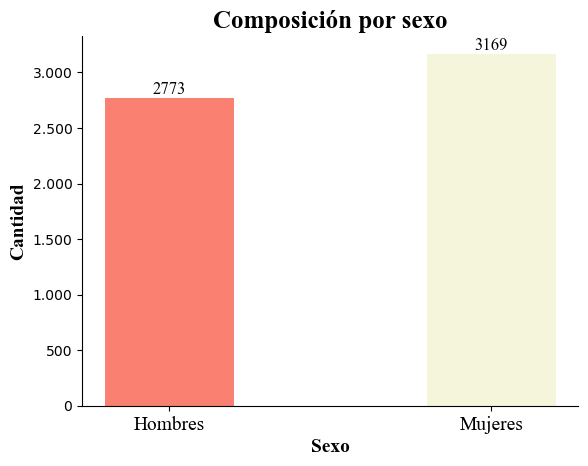

In [7]:
import matplotlib.ticker as mtick 

# Contamos la cantidad de veces que aparece cada valor en nuestra variable de sexo
conteo_valores = data_eph['CH04'].value_counts()

# Ordenamos el índice para asegurarnos de que los valores se muestren en el orden correcto
conteo_valores = conteo_valores.sort_index()

# Creamos el gráfico de barras
fig, ax = plt.subplots()
colores = ['#FA8072', '#F5F5DC']  # Colores para las barras

# Creamos las barras con etiquetas personalizadas
etiquetas = ['Hombres', 'Mujeres']
ancho_barra = 0.4  # Configuramos el ancho de la barra
barras = ax.bar(etiquetas, conteo_valores.values, color=colores, width=ancho_barra)

# Agregamos y configuramos las etiquetas y el título del gráfico
plt.xlabel('Sexo', fontweight='bold', fontsize=14, fontname='Times New Roman')
plt.ylabel('Cantidad', fontweight='bold', fontsize=14, fontname='Times New Roman')
plt.title('Composición por sexo', fontweight='bold', fontsize=18, fontname='Times New Roman')
etiquetas_formato = {'fontsize': 14, 'fontname': 'Times New Roman'}
ax.set_xticklabels(etiquetas, fontdict=etiquetas_formato)

# Editamos para que solo se vean los ejes que nos interesan
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)

# Agregamos a las etiquetas de cada tick un separador de miles
ax.yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: '{:,.0f}'.format(x).replace(',', '.')))

# Agregamos la cantidad arriba de cada barra
for barra, cantidad in zip(barras, conteo_valores.values):
    ax.text(barra.get_x() + barra.get_width() / 2, barra.get_height(), str(cantidad), ha='center', va='bottom', fontsize=12, fontname='Times New Roman', color='black')

# Guardamos el gráfico en formato JPG
plt.savefig('composicion_sexo.jpg', dpi=300, bbox_inches='tight')

# Mostramos el gráfico
plt.show()




C:\Users\Usuario\AppData\Local\Temp\ipykernel_13628\2727673379.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(etiquetas, fontdict=etiquetas_formato)


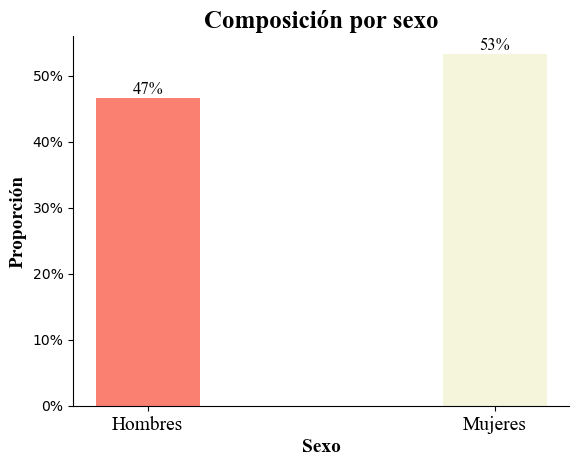

In [8]:
# Creamos el mismo gráfico pero en proporción 
# Calculamos la proporción de cada categoría
proporciones = conteo_valores / conteo_valores.sum()

# Creamos el gráfico de barras
fig, ax = plt.subplots()
colores = ['#FA8072', '#F5F5DC']  # Colores para las barras

# Creamos las barras con etiquetas personalizadas
etiquetas = ['Hombres', 'Mujeres']
ancho_barra = 0.3  # Ancho de la barra
barras = ax.bar(etiquetas, proporciones, color=colores, width=ancho_barra)

# Configuramos las etiquetas y el título del gráfico
plt.xlabel('Sexo', fontweight='bold', fontsize=14, fontname='Times New Roman')
plt.ylabel('Proporción', fontweight='bold', fontsize=14, fontname='Times New Roman')
plt.title('Composición por sexo', fontweight='bold', fontsize=18, fontname='Times New Roman')
etiquetas_formato = {'fontsize': 14, 'fontname': 'Times New Roman'}
ax.set_xticklabels(etiquetas, fontdict=etiquetas_formato)

# Configuramos los ejes
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)

# Agregamos formato a las etiquetas del eje y para mostrar la proporción como porcentaje
ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0, decimals=0))

# Agregamos el porcentaje dentro de cada barra
for barra, proporcion in zip(barras, proporciones):
    ax.text(barra.get_x() + barra.get_width() / 2, proporcion, f'{proporcion:.0%}', ha='center', va='bottom', fontsize=12, fontname='Times New Roman', color='black')    
    
# Guardamos el gráfico en formato JPG
plt.savefig('composicion_sexo_proporcion_con_etiquetas.jpg', dpi=300, bbox_inches='tight')

# Mostramos el gráfico
plt.show()

### Ejercicio 2 - D)

Realizamos la matriz de correlación con las variables sexo, estado civil, cobertura médica, nivel educativo, condición de actividad, categoría de inactividad y monto del ingreso per cápita familiar

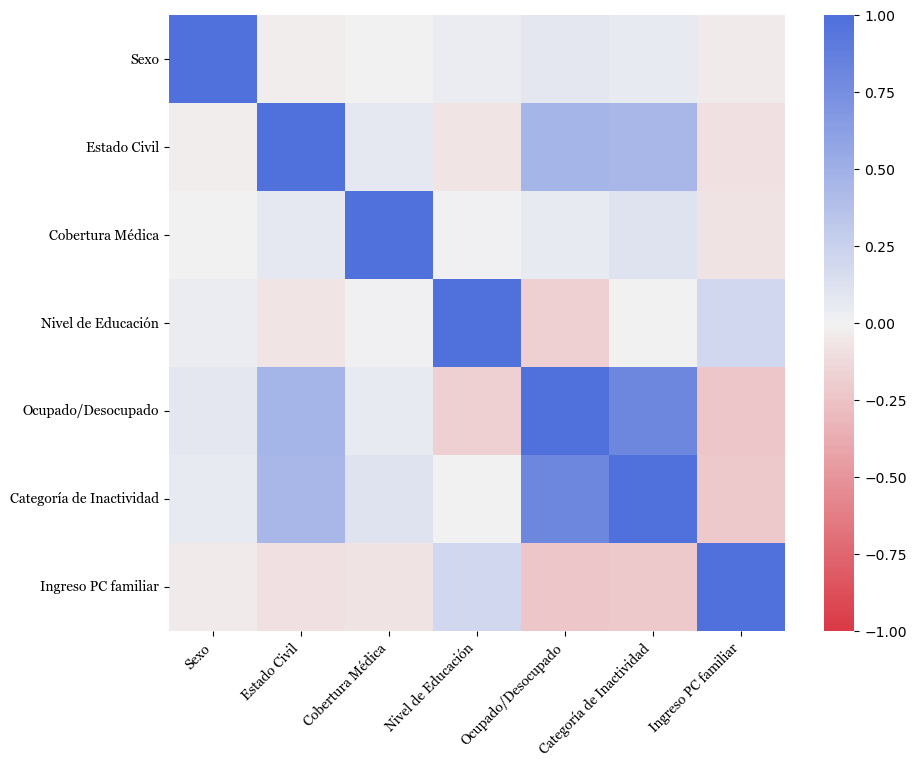

In [9]:
import seaborn as sns

# Seleccionamos las variables que usaremos en la matriz de correlación
variables = ['CH04', 'CH07', 'CH08', 'NIVEL_ED', 'ESTADO', 'CAT_INAC', 'IPCF']
data_seleccionado = data_eph[variables]

# Calculamos las correlaciones 
corr = data_seleccionado.corr()

# Convertimos la matriz de correlación en una tabla LaTeX y la exportamos
corr_latex = corr.style.to_latex()
with open('matriz_correlacion.tex', 'w') as f:
    f.write(corr_latex)

# Creamos un mapa de calor de las correlaciones
plt.figure(figsize=(10, 8))
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(10,1700, n=200),
    square=True)

# Creamos etiquetas personalizadas para filas y columnas
etiquetas_personalizadas = ['Sexo', 'Estado Civil', 'Cobertura Médica', 'Nivel de Educación', 'Ocupado/Desocupado', 'Categoría de Inactividad', 'Ingreso PC familiar']
ax.set_xticklabels(etiquetas_personalizadas, rotation=45, horizontalalignment='right', fontsize=10, fontname='Georgia')
ax.set_yticklabels(etiquetas_personalizadas, rotation=0, horizontalalignment='right', fontsize=10, fontname='Georgia')

# Guardamos el gráfico en formato JPG
plt.savefig('matriz_cor.jpg', dpi=300, bbox_inches='tight')

# Guardamos el gráfico en formato JPG
plt.savefig('composicion_genero.jpg', dpi=300, bbox_inches='tight')


# Mostrar el mapa de calor
plt.show()

### Ejercicio 2 - E)

Ahora analizaremos la cantidad de desocupados, inactivos y la media de ingreso per cápita familiar según estado

In [10]:
# Como la desocupación se codifica con el número 2, contamos la cantidad de veces que aparece este valor en la variable ESTADO
cantidad_desocupados = (data_eph['ESTADO'] == 2).sum()
print(f"La cantidad de desocupados/as es igual a {cantidad_desocupados}")

La cantidad de desocupados/as es igual a 264


In [15]:
# Como la inactividad se codifica con el número 3, contamos la cantidad de veces que aparece este valor en la variable ESTADO
cantidad_inactivos = (data_eph['ESTADO'] == 3).sum()
print(f"La cantidad de inactivos/as es igual a {cantidad_inactivos}")

La cantidad de inactivos/as es igual a 2529


In [12]:
# Calculamos la media del ingreso familiar per cápita para aquellos que están ocupados
media_ipfc_ocup = data_eph.loc[data_eph['ESTADO'] == 1, 'IPCF'].mean()
print(f"La media del ingreso per cápita familiar para los ocupados es: ${int(media_ipfc_ocup)}")


La media del ingreso per cápita familiar para los ocupados es: $93268


In [13]:
# Calculamos la media del ingreso familiar per cápita para aquellos que están desocupados
media_ipfc_desocup = data_eph.loc[data_eph['ESTADO'] == 2, 'IPCF'].mean()
print(f"La media del ingreso per cápita familiar para los desocupados es: ${int(media_ipfc_desocup)}")

La media del ingreso per cápita familiar para los desocupados es: $27664


In [14]:
# Calculamos la media del ingreso familiar per cápita para aquellos que están inactivos
media_ipfc_inac = data_eph.loc[data_eph['ESTADO'] == 3, 'IPCF'].mean()
print(f"La media del ingreso per cápita familiar para los inactivos es: ${int(media_ipfc_inac)}")

La media del ingreso per cápita familiar para los inactivos es: $44797


### Ejercicio 2 - F)

Agregamos a nuestra base los valores de adultos equivalente

In [16]:
# Nota: modificamos la tabla para que a cada edad desde 0 hasta 99 años se corresponda, según su sexo, con la proporción del adulto equivalente
# Importamos la base de datos con la que trabajaremos
data_equiv = pd.read_excel("tabla_adulto_equiv.xlsx")

In [17]:
# Definimos una función lógica para que dentro de data_eph en caso que la persona sea un hombre (CH04=1) se asigne el valor 
# de la variable Varones dentro de la base de datos de adulto equivalente, haciendo coincidir la edad en data_eph con la de
# la variable Edad dentro de la base de datos de adulto equivalente. Realizamos el mismo procedimiento para las mujeres
data_eph['adulto_equiv'] = None
def assign_data_equiv(row):
    if row['CH04'] == 1:
        return data_equiv.loc[data_equiv['Edad'] == row['CH06'], 'Varones'].values[0]
    elif row['CH04'] == 2:
        return data_equiv.loc[data_equiv['Edad'] == row['CH06'], 'Mujeres'].values[0]
    else:
        return None

# Luego, realizamos este procedimiento para todas las filas de nuestra base de datos
data_eph['adulto_equiv'] = data_eph.apply(assign_data_equiv, axis=1)

In [18]:
# Imprimimos un resumen de nuestra variable creada para chequear que no tengamos valores raros o missing values
resumen_adulto = data_eph['adulto_equiv'].describe() 
missing_values_in_adulto_equiv = data_eph['adulto_equiv'].isnull().sum()

print("Cantidad de valores faltantes en la columna 'adulto_equiv':", missing_values_in_adulto_equiv)
print(resumen_adulto)       

Cantidad de valores faltantes en la columna 'adulto_equiv': 0
count    5942.000000
mean        0.799997
std         0.152770
min         0.370000
25%         0.690000
50%         0.770000
75%         1.000000
max         1.040000
Name: adulto_equiv, dtype: float64


In [19]:
# Por último, creamos la nueva variable adulto_equiv_hog que le asigna la suma de adultos equivalentes en el hogar a cada observación
data_eph['ad_equiv_hogar'] = data_eph.groupby('CODUSU')['adulto_equiv'].transform('sum')

### Ejercicio 3
Reporte del ingreso total familiar

Nota: en nuestro código, ya hemos eliminado algunas observaciones que presentaban un ns/nr en la variable indicativa del ingreso personal (P47T). En general, estas observaciones también tenían también un valor igual a 0 en la variable ingreso total familiar. 


In [20]:
# Contamos la cantidad de veces que la variable Ingreso Total Familiar (ITF) es igual a 0
count_IFT0 = (data_eph['ITF'] == 0).sum()

print(f"La cantidad de personas que no respondieron cuál es su ingreso total familiar es igual a {count_IFT0}")

La cantidad de personas que no respondieron cuál es su ingreso total familiar es igual a 1769


In [21]:
# Creamos un DataFrame llamado "respondieron" con las observaciones donde la variable Ingreso total familiar es mayor que 0
respondieron = data_eph[data_eph['ITF'] > 0]

# Creamos un DataFrame llamado "no_respondieron" con las observaciones donde la variable Ingreso total familiar  es igual a 0
no_respondieron = data_eph[data_eph['ITF'] == 0]


### Ejercicio 4
Buscamos el ingreso necesario a nivel familiar para no ser pobre para aquellos grupos de personas que respondieron el ingreso total familiar

In [23]:
# Agregamos la variable "ingreso_necesario" al DataFrame "respondieron" según el criterio específicado en la consigna
respondieron.loc[:, 'ingreso_necesario'] = respondieron['ad_equiv_hogar'] * 57371.05


### Ejercicio 5
Generamos la variable  pobre que tome valor 1 si el Ingreso total Familiar es menor al ingreso necesario que necesita una familia y cero en caso contrario

In [25]:
# Ahora agregamos la variable pobre, según si cumple la condición de que el ingreso familiar total para cada individuo es menor 
# al necesario para cubrir la canasta básica total (CBT)
respondieron.loc[:,'pobre'] = (respondieron['ITF'] <= respondieron['ingreso_necesario']).astype(int)

In [26]:
# Finalmente, contamos la cantidad de individuos que pueden ser considerados pobres
cantidad_de_pobres = respondieron['pobre'].sum()
total_observaciones = len(respondieron)
porcentaje_pobres = (cantidad_de_pobres / total_observaciones) * 100
print(f"La cantidad de pobres en la muestra es de {cantidad_de_pobres}")
print(f"El porcentaje de pobres de la muestra es de {porcentaje_pobres:.2f}%")

La cantidad de pobres en la muestra es de 1566
El porcentaje de pobres de la muestra es de 37.53%


# Parte II - Clasificación

### Ejercicio 1
Eliminamos las variables relacionadas a ingresos, las columnas adulto_equiv; ad_equiv_hogar e ingreso_necesario

In [27]:
# Proseguimos a eliminar las variables relacionadas a ingresos
respondieron.head() #181
data_eph.head() #179 columnas

# Ingresos de la ocupación principal de los asalariados: PP08D1, PP08D4, PP08F1, PP08F2, PP08J1, PP08J2, PP08J3
# Ingresos de la ocupación principal: P21, DECOCUR, IDECOCUR, RDECOCUR, GDECOCUR
# Ingreso de otras ocupaciones: TOT_P12
# Ingreso total individual: P47T, DECINDR, IDECINDR, RDECINDR, GDECINDR, PDECINDR, ADECINDR, PONDII
# Ingresos no laborales: V2_M, V3_M, V4_M, V5_M, V8_M, V9_M, V10_M, V11_M, V12_M, V18_M, V19_AM, V21_M, T_VI
# Ingreso total familiar: ITF, DECIFR, IDECIFR, RDECIFR, GDECIFR, PDECIFR, ADECIFR
# Ingreso per cápita familiar: IPCF, DECCFR, IDECCFR, RDECCFR, GDECCFR, PDECCFR, ADECCFR, PONDIH
# Columnas agregadas: adulto_equiv, ad_equiv_hogar e ingreso_necesario
# Nota: ingreso_necesario lo teniamos dentro del dataframe de respondieron, no en el de data_eph
# Lista de las columnas a eliminar
columnas_a_eliminar = ['PP08D1', 'PP08D4', 'PP08F1', 'PP08F2', 'PP08J1', 'PP08J2', 'PP08J3',
                       'P21', 'DECOCUR', 'IDECOCUR', 'RDECOCUR', 'GDECOCUR', 'TOT_P12',
                       'P47T', 'DECINDR', 'IDECINDR', 'RDECINDR', 'GDECINDR', 'PDECINDR', 'ADECINDR', 'PONDII',
                       'V2_M', 'V3_M', 'V4_M', 'V5_M', 'V8_M', 'V9_M', 'V10_M', 'V11_M', 'V12_M', 'V18_M', 'V19_AM', 'V21_M', 'T_VI',
                       'ITF', 'DECIFR', 'IDECIFR', 'RDECIFR', 'GDECIFR', 'PDECIFR', 'ADECIFR',
                       'IPCF', 'DECCFR', 'IDECCFR', 'RDECCFR', 'GDECCFR', 'PDECCFR', 'ADECCFR', 'PONDIH','adulto_equiv','ad_equiv_hogar']



# Eliminamos las columnas
data_eph = data_eph.drop(columns=columnas_a_eliminar)
data_eph.head() #128 columnas
respondieron = respondieron.drop (columns=columnas_a_eliminar)
respondieron = respondieron.drop(columns=['ingreso_necesario'])
respondieron.head() #129 columnas
no_respondieron = no_respondieron.drop (columns=columnas_a_eliminar)
no_respondieron.head() #128

,CODUSU,ANO4,TRIMESTRE,NRO_HOGAR,COMPONENTE,H15,REGION,MAS_500,AGLOMERADO,PONDERA,...,PP11N,PP11O,PP11P,PP11Q,PP11R,PP11S,PP11T,PDECOCUR,ADECOCUR,PONDIIO
183,TQRMNOPYVHLMRLCDEIJAH00719346,2023,1,1,3,1,1,S,33,2086,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,2086
281,TQRMNOSRXHKMLUCDEIIAD00780093,2023,1,1,3,1,1,S,32,2361,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,2361
282,TQRMNOSRXHKMLUCDEIIAD00780093,2023,1,1,4,0,1,S,32,2361,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,2361
303,TQRMNOQXQHKNQLCDEIJAH00780794,2023,1,1,1,1,1,S,33,1829,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9,2429
305,TQRMNOQXQHKNQLCDEIJAH00780794,2023,1,1,3,1,1,S,33,1829,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1829


In [ ]:
# Exportamos los excel 
#data_eph.to_excel("eph.xlsx", index=False)
#respondieron.to_excel("respondieron.xlsx", index=False)
#no_respondieron.to_excel("no_respondieron.xlsx", index=False)

### Ejercicio 2
En la base respondieron generamos una base de prueba (test) y una de entrenamiento (train). La base de entrenamiento debe representar el 70% y la semilla debe ser 201. 

In [28]:
# Importamos los paquetes
import statsmodels.api as sm     

from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, recall_score 
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import RocCurveDisplay
# from sklearn.metrics import plot_roc_curve
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier

In [29]:
# Eliminamos las string 
columnas_string = respondieron.select_dtypes(include=['object']).columns
respondieron = respondieron.drop(columnas_string, axis=1)

# Eliminamos aquellas variables que tienen muchos missings y no creemos que tenga valor predictivo en nuestra variable de interés.
# Especificamos un umbral de valores faltantes
umbral = 150
# Cramos una función para eliminar filas con más del "umbral" de valores faltantes
def eliminar_columnas_con_missings(respondieron, umbral):
    columnas_a_eliminar = [columna for columna in respondieron.columns if respondieron[columna].isna().sum() > umbral]
    respondieron = respondieron.drop(columnas_a_eliminar, axis=1)
    return respondieron

# Aplicamos la función para eliminar columnas con más del "umbral" de valores faltantes
respondieron = eliminar_columnas_con_missings(respondieron, umbral)

# Resultado
print(respondieron)

       ANO4  TRIMESTRE  NRO_HOGAR  COMPONENTE  H15  REGION  AGLOMERADO  \
102    2023          1          1           1    1       1          33   
103    2023          1          1           2    1       1          33   
104    2023          1          1           1    1       1          33   
105    2023          1          1           2    1       1          33   
106    2023          1          1           3    0       1          33   
...     ...        ...        ...         ...  ...     ...         ...   
48593  2023          1          1           5    0       1          33   
48594  2023          1          1           1    1       1          33   
48595  2023          1          1           2    1       1          33   
48596  2023          1          1           3    0       1          33   
48597  2023          1          1           1    1       1          33   

       PONDERA  CH03  CH04  ...  PP02C5  PP02C6  PP02C7  PP02C8  PP02E  PP02H  \
102       1545     1     2  ..

In [30]:
# Definimos a la variable pobre como nuestra variable dependiente
Y = respondieron['pobre']

# Definimos las variables independientes (X) excluyendo 'pobre' y agregando una columna de unos
X = respondieron.drop(columns=['pobre'])

# Agregamos una columna de unos como la primera columna
X = pd.concat([pd.Series(1, index=X.index, name='constante'), X], axis=1)

# Dividimos la base de datos en conjuntos de entrenamiento y prueba (70% entrenamiento, 30% prueba)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=201)


### Ejercicio 3
 Implementamos logit, análisis discrimiante lineal, KNN con k=3
 

### Logit

In [32]:
# Inicializamos con el modelo de regresión logística
log_reg = LogisticRegression(max_iter=1000).fit(X_train, Y_train)

# Hacemos las predicciones
Y_test_pred_score = log_reg.predict_proba(X_test)[:,1] 
Y_test_pred = log_reg.predict(X_test)

C:\Users\Usuario\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [33]:
# Calculamos la matriz de confusión
matriz_confusion = confusion_matrix(Y_test, Y_test_pred)
print('Confusion Matrix:')
print(matriz_confusion) 

Confusion Matrix:
[[634 145]
 [156 317]]


In [34]:
# Calculamos la precisión
print('Accuracy Score:', accuracy_score(Y_test, Y_test_pred))

Accuracy Score: 0.7595846645367412


In [35]:
# Valores AUC
auc = roc_auc_score(Y_test, Y_test_pred)
print('AUC: %.3f' % auc)

AUC: 0.742


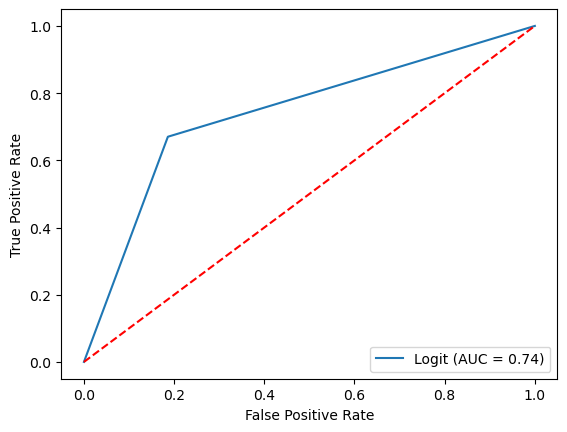

In [52]:
# Hacemos la curva ROC
fpr, tpr, thresholds = roc_curve(Y_test, Y_test_pred)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=auc, estimator_name='Logit')
display.plot()  
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.savefig('ROC_logit.jpg', dpi=300, bbox_inches='tight')
plt.show() 

### Análisis discriminante lineal

In [37]:
# Calculamos el número de componentes a utilizar en el análisis de discriminante lineal (LDA)
# Nota: limitaciones de LDA, que no puede tener más componentes que el número de clases menos 1.
n_components = min(X_train.shape[1], len(set(Y_train)) - 1)
lda = LinearDiscriminantAnalysis(n_components=n_components)
lda = lda.fit(X_train, Y_train)
X_r = lda.transform(X_train)
Y_test_pred_lda = lda.predict(X_test)

In [38]:
# Calculamos la matriz de confusión
matriz_confusion_lda = confusion_matrix(Y_test, Y_test_pred_lda)
print('Confusion Matrix:')
print(matriz_confusion_lda) 

Confusion Matrix:
[[622 157]
 [153 320]]


In [39]:
# Calculamos la precisión
print('Accuracy Score:', accuracy_score(Y_test, Y_test_pred_lda))

Accuracy Score: 0.7523961661341853


In [40]:
# Valores AUC
aucl = roc_auc_score(Y_test, Y_test_pred_lda)
print('AUC: %.3f' % aucl)

AUC: 0.737


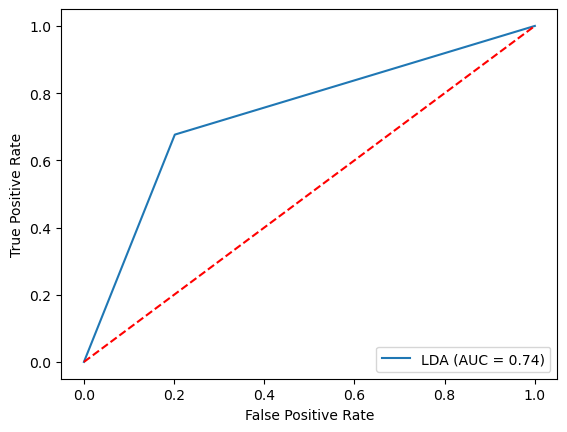

In [51]:
# Hacemos la curva ROC
fprl, tprl, thresholdsl = roc_curve(Y_test, Y_test_pred_lda)
display = RocCurveDisplay(fpr=fprl, tpr=tprl, roc_auc=aucl, estimator_name='LDA')
display.plot()  
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.savefig('ROC_ADL.jpg', dpi=300, bbox_inches='tight')
plt.show() 

### K - Vecinos cercanos

In [42]:
# Establecemos a X_train y X test en Numpy
X_train_a = X_train.to_numpy()
X_test_a = X_test.to_numpy()

# Fijamos el valor de k en 3
k = 3

# Creamos un modelo KNN con k=3
knn = KNeighborsClassifier(n_neighbors=k)

# Ajustamos el modelo KNN con los datos de entrenamiento
knn.fit(X_train_a, Y_train)

# Realizamos predicciones en los datos de prueba
Y_test_pred_knn = knn.predict(X_test_a)

In [43]:
# Calculamos la matriz de confusión
matriz_confusion_knn = confusion_matrix(Y_test, Y_test_pred_knn)
print('Confusion Matrix:')
print(matriz_confusion_knn)

Confusion Matrix:
[[600 179]
 [205 268]]


In [44]:
# Calcula la precisión del modelo KNN
accuracy_knn = accuracy_score(Y_test, Y_test_pred_knn)
print(f"Para k = {k}, la precisión del modelo KNN es: {accuracy_knn:.2f}")

Para k = 3, la precisión del modelo KNN es: 0.69


In [45]:
# Valores AUC
auck = roc_auc_score(Y_test, Y_test_pred_knn)
print('AUC: %.3f' % auck)

AUC: 0.668


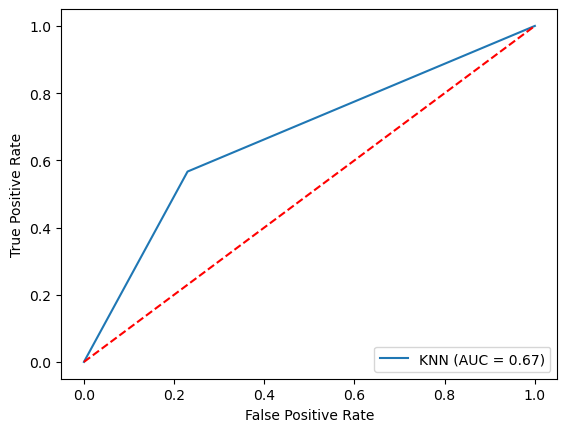

In [50]:
# Hacemos la curva ROC
fprk, tprk, thresholdsk = roc_curve(Y_test, Y_test_pred_knn)
display = RocCurveDisplay(fpr=fprk, tpr=tprk, roc_auc=auck, estimator_name='KNN')
display.plot()  
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.savefig('ROC_KNN.jpg', dpi=300, bbox_inches='tight')
plt.show() 


### Ejericio 4
El que mejor predice es el Logit - respondemos en PDF

### Ejericio 5
Predecir qué personas son pobres dentro de la base no respondieron.

In [53]:
# Dejamos en la base de no_respondieron las mismas variables que aparecen en respondieron.
# Lista de nombres de columnas en 'respondieron'
columnas_respondieron = respondieron.columns
columnas_respondieron = columnas_respondieron.drop("pobre")

# Filtramos en 'no_respondieron' para dejar solo las columnas presentes en 'respondieron'
no_respondieron = no_respondieron[columnas_respondieron]

In [54]:
# Agregamos una columna de la constante 
Xp = no_respondieron
Xp = pd.concat([pd.Series(1, index=Xp.index, name='constante'), Xp], axis=1)

In [55]:
# Generamos la variable Y según el método entrenado
Y_norespondieron_pred = log_reg.predict(Xp)

# Calcula la proporción de personas "pobres" y "no pobres"
proporcion_pobres = (Y_norespondieron_pred == 1).mean()
proporcion_no_pobres = (Y_norespondieron_pred == 0).mean()

print("Proporción de personas consideradas 'pobres':", proporcion_pobres)
print("Proporción de personas consideradas 'no pobres':", proporcion_no_pobres)


Proporción de personas consideradas 'pobres': 0.5183719615602035
Proporción de personas consideradas 'no pobres': 0.4816280384397965


### Ejericio 2_2 - Comienzo del ejercicio 6.
En la base respondieron generamos una base de prueba (test) y una de entrenamiento (train). La base de entrenamiento debe representar el 70% y la semilla debe ser 201. 
## NOTA IMPORTANTE: habíamos realizado los ejercicios con la muestra recortada, lo dejamos para observar el comportamiento de los modelos.

In [61]:
# Para implementar la predicción, tomaremos aquellas variables que creemos relevantes, dejando de lado aquellas que son string
# tienen varios missings o son creemos irrelevantes para rpedecir nuestra variable de interés
columnas_deseadas = ['pobre', 'CH03', 'CH04', 'CH06', 'CH07', 'CH08', 'CH09', 'CH10', 'CH12', 'NIVEL_ED', 'CH16', 'ESTADO', 'CAT_INAC']
respondieron_2 = respondieron[columnas_deseadas]

# Definimos a la variable pobre como nuestra variable dependiente
Y_2 = respondieron_2['pobre']

# Definimos las variables independientes (X) excluyendo 'pobre' y agregando una columna de unos
X_2 = respondieron_2.drop(columns=['pobre'])

# Agregamos una columna de unos como la primera columna
X_2 = pd.concat([pd.Series(1, index=X_2.index, name='constante'), X_2], axis=1)

# Dividimos la base de datos en conjuntos de entrenamiento y prueba (70% entrenamiento, 30% prueba)
X_train_2, X_test_2, Y_train_2, Y_test_2 = train_test_split(X_2, Y_2, test_size=0.3, random_state=201)

### Ejercicio 3_2
 Implementamos logit, análisis discrimiante lineal, KNN con k=3
 

### Logit_2

In [68]:
# Inicializamos con el modelo de regresión logística
log_reg_2 = LogisticRegression(max_iter=1000).fit(X_train_2, Y_train_2)

# Hacemos las predicciones
Y_test_pred_score_2 = log_reg_2.predict_proba(X_test_2)[:,1] 
Y_test_pred_2 = log_reg_2.predict(X_test_2)


In [69]:
# Calculamos la matriz de confusión
matriz_confusion_2 = confusion_matrix(Y_test_2, Y_test_pred_2)
print('Confusion Matrix:')
print(matriz_confusion_2) 

Confusion Matrix:
[[641 138]
 [245 228]]


In [70]:
# Calculamos la precisión
print('Accuracy Score:', accuracy_score(Y_test_2, Y_test_pred_2))

Accuracy Score: 0.6940894568690096


In [71]:
# Valores AUC
auc_2 = roc_auc_score(Y_test_2, Y_test_pred_2)
print('AUC: %.3f' % auc_2)

AUC: 0.652


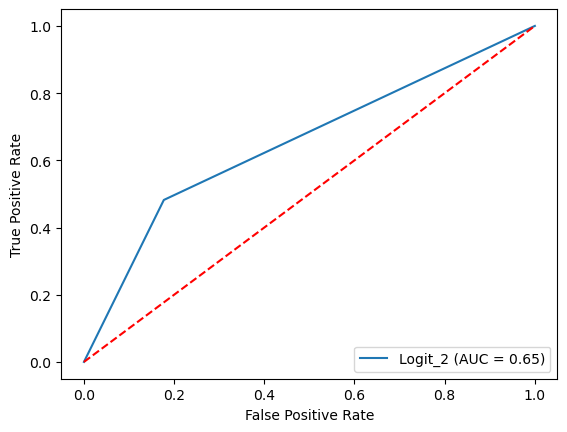

In [72]:
# Hacemos la curva ROC
fpr_2, tpr_2, thresholds_2 = roc_curve(Y_test_2, Y_test_pred_2)
display = RocCurveDisplay(fpr=fpr_2, tpr=tpr_2, roc_auc=auc_2, estimator_name='Logit_2')
display.plot()  
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.show() 

### Análisis Discriminante_2

In [73]:
# se calcula el número de componentes a utilizar en el análisis de discriminante lineal (LDA)
# Nota: limitaciones de LDA, que no puede tener más componentes que el número de clases menos 1.
n_components_2 = min(X_train_2.shape[1], len(set(Y_train_2)) - 1)
lda_2 = LinearDiscriminantAnalysis(n_components=n_components_2)
lda_2 = lda_2.fit(X_train_2, Y_train_2)
X_r_2 = lda_2.transform(X_train_2)
Y_test_pred_lda_2 = lda_2.predict(X_test_2)

In [74]:
# Calculamos la matriz de confusión
matriz_confusion_lda_2 = confusion_matrix(Y_test_2, Y_test_pred_lda_2)
print('Confusion Matrix:')
print(matriz_confusion_lda_2) 

Confusion Matrix:
[[633 146]
 [234 239]]


In [75]:
# Calculamos la precisión
print('Accuracy Score:', accuracy_score(Y_test_2, Y_test_pred_lda_2))

Accuracy Score: 0.6964856230031949


In [76]:
# Valores AUC
aucl_2 = roc_auc_score(Y_test_2, Y_test_pred_lda_2)
print('AUC: %.3f' % aucl_2)

AUC: 0.659


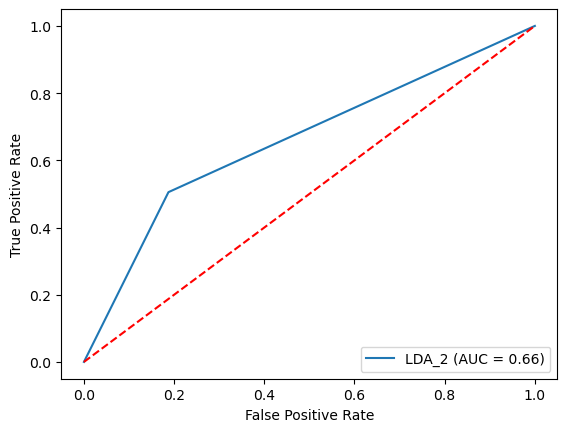

In [77]:
# Hacemos la curva ROC
fprl_2, tprl_2, thresholdsl_2 = roc_curve(Y_test_2, Y_test_pred_lda_2)
display = RocCurveDisplay(fpr=fprl_2, tpr=tprl_2, roc_auc=aucl_2, estimator_name='LDA_2')
display.plot()  
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.show() 

### Vecinos cercanos_2

In [78]:
# Fijamos el valor de k en 3
k = 3
knn_2 = KNeighborsClassifier(n_neighbors=k)
knn_2.fit(X_train_2, Y_train_2)
Y_test_pred_knn_2 = knn_2.predict(X_test_2)

In [79]:
# Calculamos la matriz de confusión
matriz_confusion_knn_2 = confusion_matrix(Y_test_2, Y_test_pred_knn_2)
print('Confusion Matrix:')
print(matriz_confusion_knn_2)

Confusion Matrix:
[[598 181]
 [200 273]]


In [80]:
# Calcula la precisión del modelo KNN
accuracy_knn_2 = accuracy_score(Y_test_2, Y_test_pred_knn_2)
print(f"Para k = {k}, la precisión del modelo KNN es: {accuracy_knn_2:.2f}")

Para k = 3, la precisión del modelo KNN es: 0.70


In [81]:
# Valores AUC
auck_2 = roc_auc_score(Y_test_2, Y_test_pred_knn_2)
print('AUC: %.3f' % auck_2)

AUC: 0.672


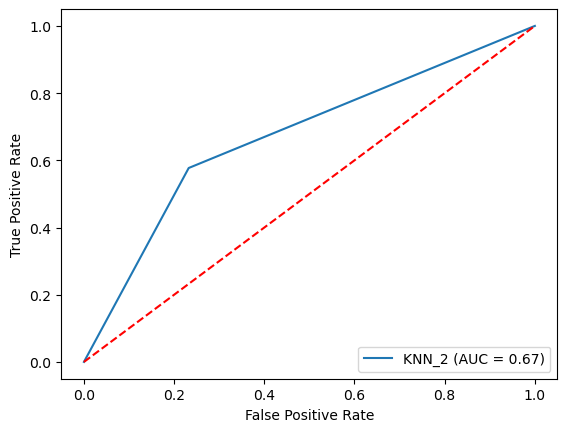

In [82]:
# Hacemos la curva ROC
fprk_2, tprk_2, thresholdsk_2 = roc_curve(Y_test_2, Y_test_pred_knn_2)
display = RocCurveDisplay(fpr=fprk_2, tpr=tprk_2, roc_auc=auck_2, estimator_name='KNN_2')
display.plot()  
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.show() 

### Ejercicio 4_2
El que mejor predice es el de vecinos cercanos.

### Ejercicio 5_2
Predecir fuera de la muestra

In [83]:
# Seleccionamos las columnas de interés como en el data frame respondieron
columnas_deseadas_21 = ['CH03', 'CH04', 'CH06', 'CH07', 'CH08', 'CH09', 'CH10', 'CH12', 'NIVEL_ED', 'CH16', 'ESTADO', 'CAT_INAC']
no_respondieron_2 = no_respondieron[columnas_deseadas_21]

# Agregamos una columna de la constante 
Xp_2 = no_respondieron_2
Xp_2 = pd.concat([pd.Series(1, index=Xp_2.index, name='constante'), Xp_2], axis=1)

In [85]:
# Generamos la variable Y según el método entrenado
Y_norespondieron_pred_2 = knn_2.predict(Xp_2)

# Calcula la proporción de personas "pobres" y "no pobres"
proporcion_pobres_2 = (Y_norespondieron_pred_2 == 1).mean()
proporcion_no_pobres_2 = (Y_norespondieron_pred_2 == 0).mean()

print("Proporción de personas consideradas 'pobres':", proporcion_pobres_2)
print("Proporción de personas consideradas 'no pobres':", proporcion_no_pobres_2)



Proporción de personas consideradas 'pobres': 0.46806105144149235
Proporción de personas consideradas 'no pobres': 0.5319389485585077
